# Statistical Research on Mosquito Dataset

## Contents

1. [Introduction](#intro)
2. [Exploratory Data Analysis](#eda)
3. [Trend between Mosquito number and month](#tmm)
4. [Statistical Analysis](#sa)
5. [Linear Modelling](#linm)
6. [Logistic Modelling](#logm)
7. [Conclusion](#conc)

<a id = 'intro'></a>
## Introduction

West Nile virus (WNV) is the leading cause of mosquito-borne disease in the continental United States.  It is most commonly spread to people (as well as horses and birds) by the bite of an infected mosquito. Cases of WNV occur during mosquito season, which starts in the summer and continues through autumn.

There are no vaccines to prevent or medications to treat WNV in people. Fortunately, most people infected with WNV do not feel sick. About 1 in 5 people who are infected develop a fever and other symptoms. About 1 out of 150 infected people develop a serious, sometimes fatal, illness. 

The city of Chicago, Illinois has been keeping track of mosquito populations and WNV prevalence using a series of 
traps that have been placed around the city. Studying the captured specimens to determine if they hold the WNV or not.

After capture, insects would be stored in pools of up to 50 mosquitoes for testing of WNV via RT-PCR (to test for presence of viral DNA). After this process, there were a total of 18,495 pools (rows of dataset) and 13 different features were also stored. This Data is important, not only for surveillance, but also as it has potential to predict numbers and positivity of mosquitoes in the future as well as prevalence of WN fever in humans.

In this report I will carry out my research on the dataset applying statistical methods to the data. 

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
from scipy import stats

In [42]:
df = pd.read_csv('data.csv')

<a id = 'eda'></a>

## Exploratory Data Analysis

In [43]:
utils.eda(df)


Rows: 18495 	 Columns: 12

Total null rows: 0
Percentage null rows: 0.0%

Total duplicate rows: 862
Percentage dupe rows: 4.66%

Year                 int64
Week                 int64
Address Block       object
Trap                object
Trap type           object
Date                object
Mosquito number      int64
WNV Present         object
Species             object
Lat                float64
Lon                float64
Month                int64
dtype: object
-----


The head of the dataframe is: 


,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9



The tail of the dataframe is:


,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,positive,CULEX PIPIENS,41.857843,-87.635858,9
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,positive,CULEX PIPIENS,41.965376,-87.758403,8
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,positive,CULEX RESTUANS,41.662395,-87.590176,7
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,positive,CULEX RESTUANS,41.919197,-87.664758,8
18494,2015,33,100XX W OHARE AIRPORT,T902,GRAVID,2015-08-20 00:08:00,6,positive,CULEX RESTUANS,41.977738,-87.880969,8



Description of the numerical columns is as follows


,Year,Week,Mosquito number,Lat,Lon,Month
count,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000
mean,2012.905812,31.004001,10.879913,41.852599,-87.712611,7.627088
std,3.725857,4.332020,13.475066,0.115419,0.095409,0.998079
min,2007.000000,20.000000,1.000000,41.644720,-87.880969,5.000000
25%,2010.000000,28.000000,2.000000,41.754148,-87.778235,7.000000
50%,2013.000000,31.000000,5.000000,41.872873,-87.703105,8.000000
75%,2016.000000,34.000000,14.000000,41.970102,-87.643076,8.000000
max,2019.000000,40.000000,50.000000,42.017801,-87.531051,10.000000


Using the utils library, the EDA process was streamlined and a basic understanding of the data in the dataframe was quickly understood. Looking at the info, the datatype of the date column is a string type. That will need to be changed to ensure that data can be extracted from the date type column. Ignoring the Date column, there are 6 numerical columns and 5 categorical columns. 

There are no rull rows in the dataframe, however, there are 862 duplicate rows accounting for 4.6% of the dataframe. Referring to the data dictionary, it was mentioned that the mosquito number was capped at 50 and a new row with the additional mosquito numbers was created below. This contributed to the duplicate rows as it meant that everything about the two rows was the same apart from the mosquito number.

In [44]:
df['Date'] = df['Date'].astype('datetime64')

In [45]:
df["WNV Present"] = df["WNV Present"].map({"positive": 1, "negative": 0})

In [46]:
dfBinary = pd.get_dummies(df["Trap type"])
df = pd.concat([df, dfBinary],axis = 1)

#Sanity Check
df.head(5)

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9,0,1,0,0


In [47]:
df = df.drop(['Trap type'], axis= 1)

With the help of the map function I was able to convert the WNV Present column into a binary column, where it returned 0 if it was negative and 1 if it was positive. This will aid in the analysis of the dataframe and ensure that we can perform modelling on the whole dataframe. Furthermore, with the help of the get_dummies function, I was able to convert the Trap Type column into dummy variables. Returning a one when the specific trap type column matches up. Given that I had seperated the trap type column into dummy variables, removal of the orignal Trap type column was necessary as this would skew the results otherwise. 

<a id = 'tmm'></a>

## Insights and Trends

I first wanted to study the relationship between the the mosquito number and month. I was interested to see if there was a relationship as my inital assumption at looking at the dataset would imply that there was. There were different ways that this could have been explored, I chose two methods. Given that the data was recorded across multiple years, I first wrote code that counted the number of times a specific month was recorded across all the years as demonstrated below. 

In [48]:
num_of_month= df[['Year','Month']].groupby('Month').nunique()
number_per_month = df[['Mosquito number', 'Month']].groupby('Month').sum()
average_per_month = number_per_month/num_of_month.values
average_per_month

,Mosquito number
Month,
5,58.000000
6,2200.538462
7,4539.000000
8,6402.230769
9,2235.000000
10,302.500000


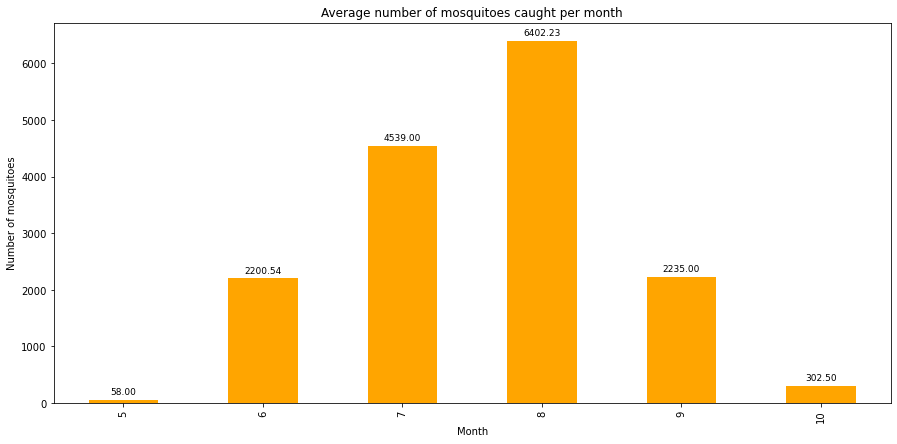

In [49]:
plt.figure(figsize = (15,7))
plots = average_per_month['Mosquito number'].plot(kind = 'bar', color = 'orange')
plt.xlabel('Month')
plt.ylabel('Number of mosquitoes')
plt.title('Average number of mosquitoes caught per month')


for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
    
plt.show()

The bar chart above helps to demonstrate the average number of mosquitoes caught per month for each month. The month of May was only recorded twice and October was only recorded four times across the years. This is represented by the low figures in the chart. The lower the amount of times the mosquitoes numbers were recorded meant that there were lower numbers produced as demonstrated in line 15, which has 116 and 1210 mosquitoes caught for May and October respectively. 

In [50]:
average = df[['Date','Month','Mosquito number']] 
average['Day'] = average['Date'].dt.day
average.head(5)

/var/folders/0w/fjxvhg9j3t941vclb56j1ph40000gn/T/ipykernel_1400/801511434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average['Day'] = average['Date'].dt.day


,Date,Month,Mosquito number,Day
0,2019-09-26 00:09:00,9,2,26
1,2019-09-26 00:09:00,9,1,26
2,2019-09-26 00:09:00,9,2,26
3,2019-09-26 00:09:00,9,1,26
4,2019-09-26 00:09:00,9,9,26


In [51]:
average_day = average.groupby(['Month','Day']).sum()
average_day = round(average_day.groupby('Month').mean(),2)
average_day

,Mosquito number
Month,
5,58.00
6,1059.52
7,2034.72
8,2684.81
9,1001.90
10,302.50


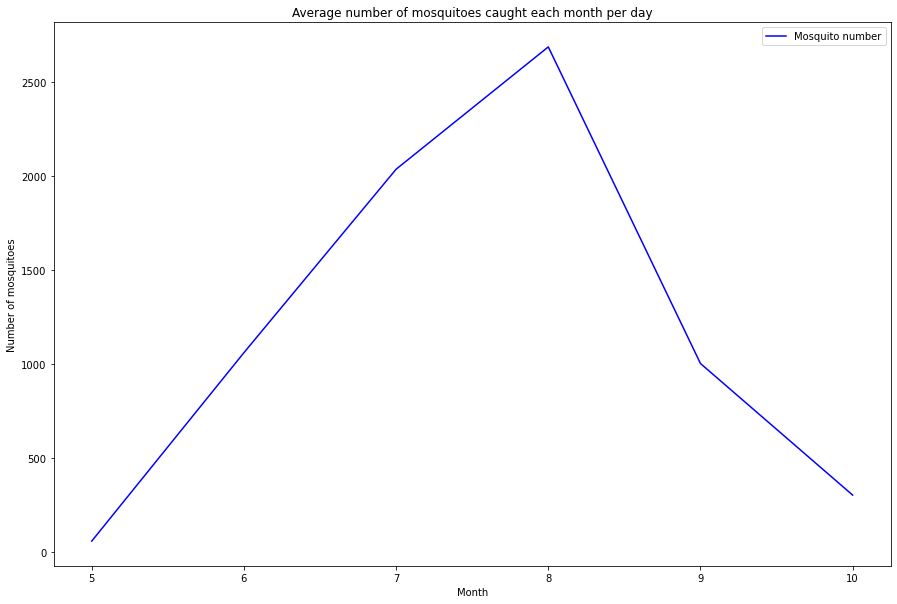

In [52]:
average_day.plot(kind = 'line', color = 'blue',figsize = (15,10))
plt.xlabel('Month')
plt.ylabel('Number of mosquitoes')
plt.title('Average number of mosquitoes caught each month per day')
plt.show()

I also chose another method of determining how many days mosquitoes were caught for each specific month across all the years. Then dividing the total monthly mosquito numbers by each day amount. Again the same trends can be seen that there is a rise and then dip in values. The peak reaching highs of 2034 and lows of 58 in August and May respectively. 

Looking at both charts above, the average number of mosquitoes caught per month increases during summer reaching a peak in August before dropping back down again. Studies have shown that precipitation patterns and warmer temperatures  can accelerate mosquito development, biting rates, and the incubation of the disease within a mosquito. 

Rainfall contributes by creating breeding sites for mosquitoes and it has been recorded that August is one of the wettest months for Chicago, followed by July and June. The bar chart above reflects the precipitation pattern. The best way to reduce the number of mosquitos is to eliminate all sources of standing water that can support mosquito breeding, including water in bird baths, ponds, flowerpots, wading pools, old tires and any other receptacles. With August being such a wet month, this causes there to be an increase in stagnant water puddles leading to an increase in breeding.

Furthermore, July is recorded to be on average the hottest month of the year. With the tail end of the month still seeing record highs. This warm weather also provides perfect conditions for mosquitoes to breed and encourages biting. 

<a id = 'sa'></a>

## Statistical Analysis

Before statistical analysis of the dataset can be conducted, our assumptions of the dataset must be tested. To determine whether each of the columns in the dataframe are normally distributed - I plotted the data on a histogram. In certain cases in Address Block and the dummy variables of the Trap type, there is very little that will be seen from the visualisations. However, being able to visualise each column in a histogram will help to show if there is any normality in the distribution of the data. 

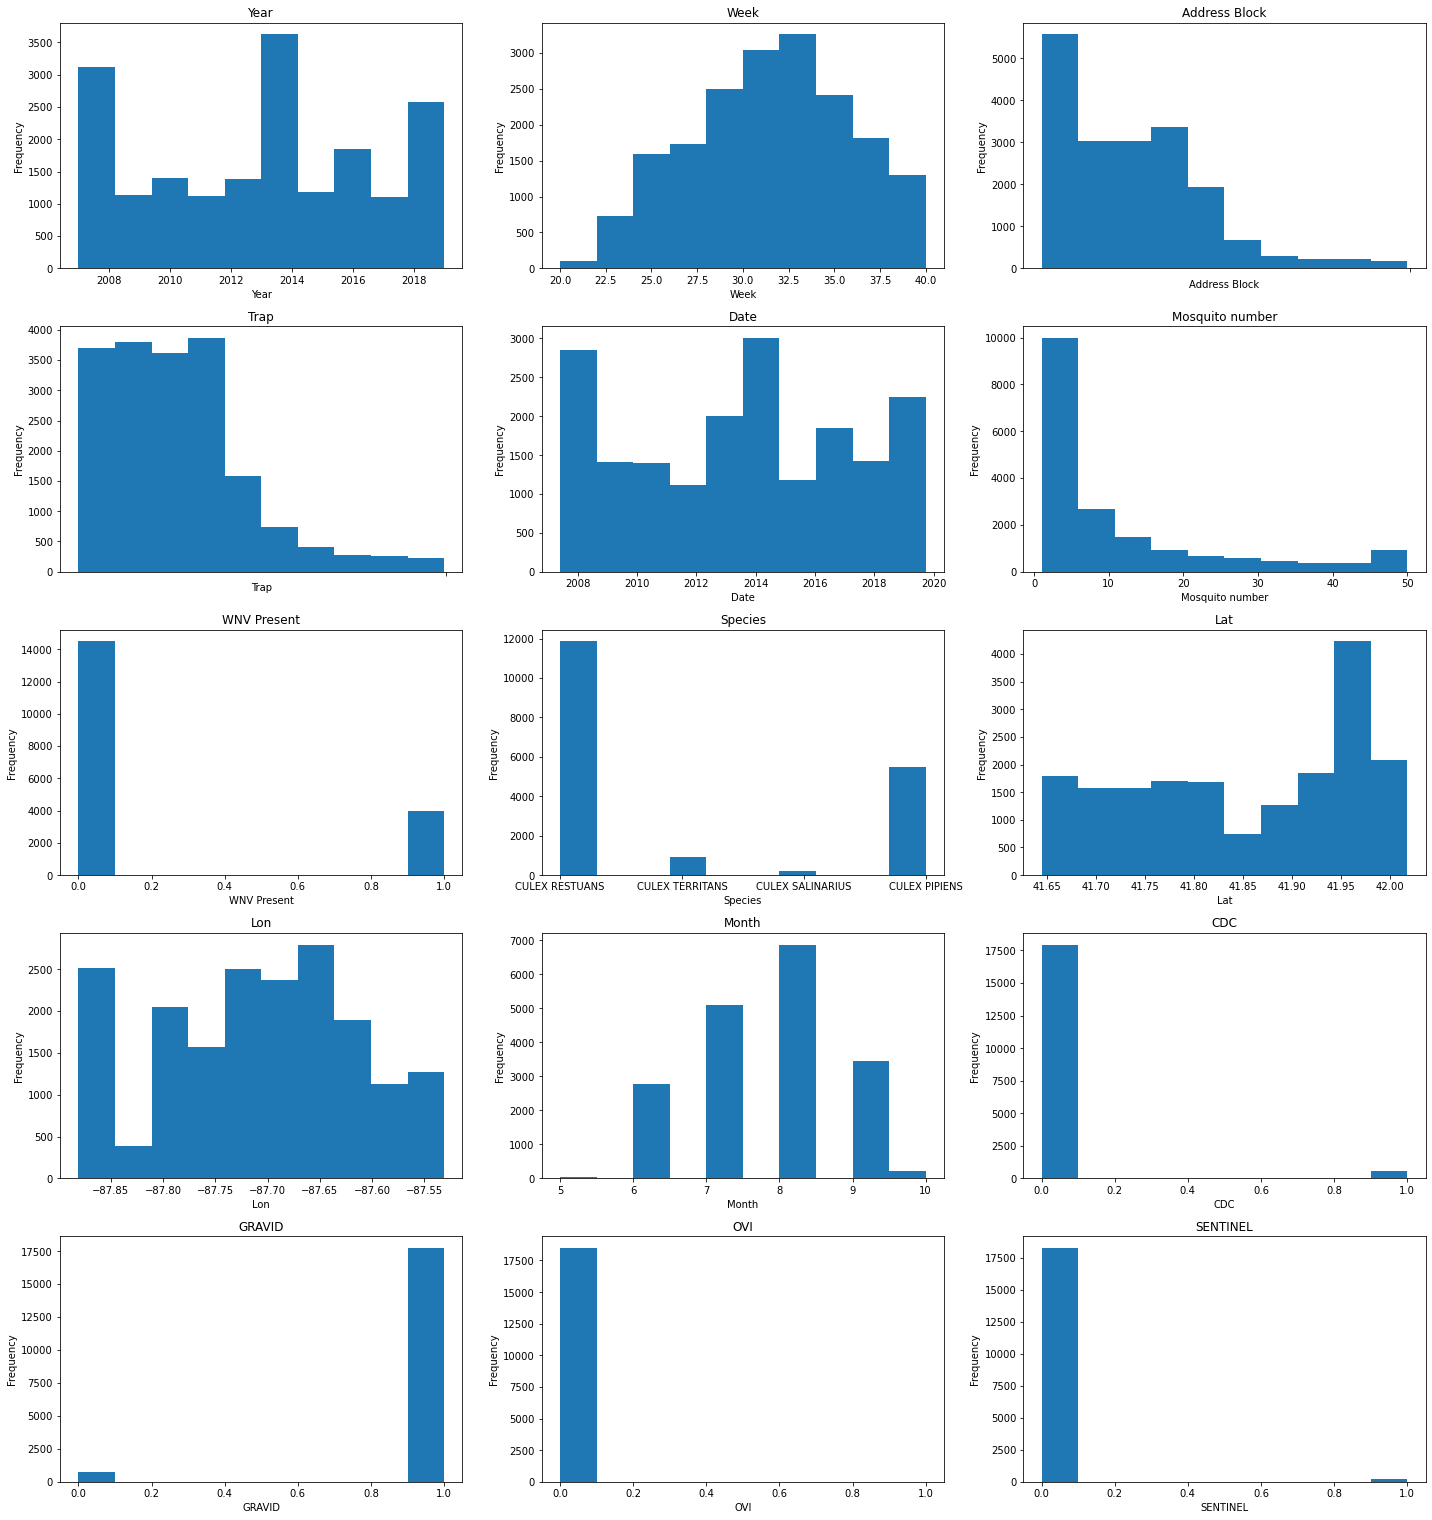

In [53]:
plt.subplots(5, 3, figsize=(20, 25))

count = 1

for col in df.columns:
    
    plt.subplot(6, 3, count)
    plt.hist(df[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    if (df[col].dtypes == 'object') & (df[col].nunique() > 5):
        plt.xticks('')
    

    count += 1
    
plt.tight_layout()
plt.show()

Shapiro-Wilk tests have a null hypothesis that data is normal and an alternate hypothesis that the data is not.

$$ H_0 : \text{Data is normally distributed}  \quad vs. \quad H_1 : \text{Data is not normally distributed} $$

We can run a Shapiro-Wilk test using scipy:

In [54]:
df_shapiro = df.drop(columns = ['Species','Address Block','Trap','Date'], axis = 1)

In [55]:
for col in df_shapiro:
    print("The", col, "shapiro test value is : ", stats.shapiro(df_shapiro[col]))

The Year shapiro test value is :  ShapiroResult(statistic=0.9439342021942139, pvalue=0.0)
The Week shapiro test value is :  ShapiroResult(statistic=0.9806886911392212, pvalue=8.547920632381384e-44)
The Mosquito number shapiro test value is :  ShapiroResult(statistic=0.7328650951385498, pvalue=0.0)
The WNV Present shapiro test value is :  ShapiroResult(statistic=0.5068212151527405, pvalue=0.0)
The Lat shapiro test value is :  ShapiroResult(statistic=0.9046128988265991, pvalue=0.0)
The Lon shapiro test value is :  ShapiroResult(statistic=0.9603397846221924, pvalue=0.0)
The Month shapiro test value is :  ShapiroResult(statistic=0.9001780152320862, pvalue=0.0)
The CDC shapiro test value is :  ShapiroResult(statistic=0.15692734718322754, pvalue=0.0)
The GRAVID shapiro test value is :  ShapiroResult(statistic=0.19590115547180176, pvalue=0.0)
The OVI shapiro test value is :  ShapiroResult(statistic=0.0009562373161315918, pvalue=0.0)
The SENTINEL shapiro test value is :  ShapiroResult(statisti

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [56]:
df2 = pd.get_dummies(df["Species"])
dfcorr = pd.concat([df, df2],axis = 1)
dfcorr = dfcorr.drop(columns = ['Species','Address Block','Trap','Date','WNV Present'], axis = 1)

I conducted a Shapiro-Wilk test to help determine whether the data in each column was normally distributed and get further clarification. I created a seperate dataframe to conduct this analysis and removed all the categorical variables from the dataframe as this would return errors. Looking at the results above from the Shapiro-Wilk tests, each of the columns returns back a P-value of 0. Therefore, we can reject the null hypothesis for each column that they are normally distributed. There is a high probability that the alternative hypothesis that the data is not normally distributed can be accepted.

The test to determine the statistical significance of both the WNV Present and Mosquito species is with a chi-squared test. We want to see whether there is an effect on WNV Present with relation to species. When the data we want to make inferences about is categorical, we would use the Chi squared test which in this case is WNV Present.

A Chi-Squared test tells us whether data is distributed across multiple variables as expected, or whether there is a statistically significant relationship between two categorical variables.

For a Chi-Squared test for independence, our hypotheses are:

$H_0$: There is no relationship between WNV Present and Species. (They are independent.)

$H_1$: There is _some_ relationship between WNV Present and Species. (They are not independent.)


First, the species column had to split up for each specific species with the associated mosquito number count. 

In [57]:
df2 = df.groupby('Species')['WNV Present'].value_counts().unstack().T
df2

Species,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
WNV Present,,,,
0,4074,9309,215,903
1,1412,2557,11,14


In [58]:
stats.chi2_contingency(df2)

(311.10394683130164,
 3.9302341764409087e-67,
 3,
 array([[4301.29689105, 9303.5342525 ,  177.19524196,  718.97361449],
        [1184.70310895, 2562.4657475 ,   48.80475804,  198.02638551]]))

The first two numbers returned are the Chi squared statistic and the p-value. The p value is incredibly small but it is below the threshold value of 0.05. Therefore we can reject the null hypothesis that the two categories are independent of each other. There is a relationship between the species and whether WNV is present or not. 

In [59]:
df2 = df2.T
df2.rename(index={0:'Not Present'},inplace=True)
df2.rename(index={1:'Present'},inplace=True)

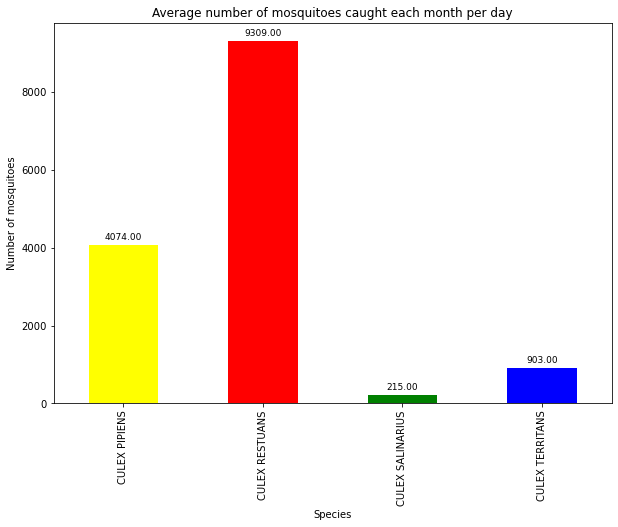

In [60]:
plt.figure(figsize = (10,7))
plots = df2[0].plot(kind = 'bar', color=['yellow', 'red', 'green', 'blue'])
plt.xlabel('Species')
plt.ylabel('Number of mosquitoes')
plt.title('Average number of mosquitoes caught each month per day')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')


plt.show()

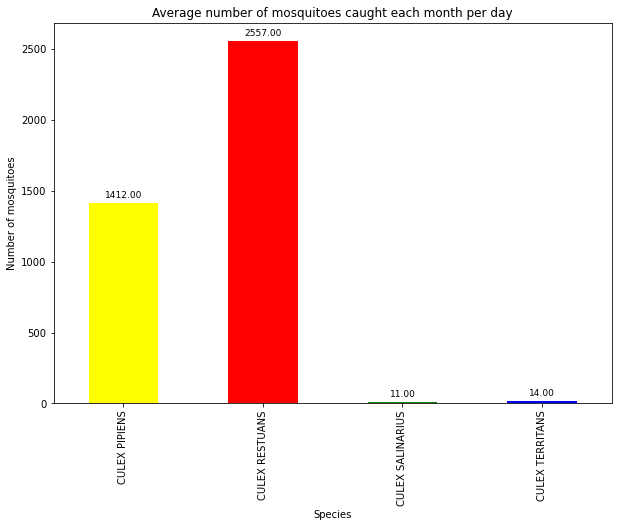

In [61]:
plt.figure(figsize = (10,7))
plots = df2[1].plot(kind = 'bar',color=['yellow', 'red', 'green', 'blue'])
plt.xlabel('Species')
plt.ylabel('Number of mosquitoes')
plt.title('Average number of mosquitoes caught each month per day')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')


plt.show()

As noted earlier, CULEX PIPIENS was the mosquito with the highest infection rate, however, CULEX RESTUANS was more abundant with nearly double the more infected individuals from this species then CULEX PIPIENS. But of those infected the ratio that were infected with WNV was much lower. CULEX TERRITANS had the lowest infection rate which is due to the fact that they tend to feed on cold-blooded animals. Meanwhile, CULEX SALINARIUS was the lowest in both bites and infection rates as this was due to environmental conditions. 

The other 2 values returned are the degrees of freedom and an array of expected values. These help informs the calculations that lead to the p-value. The degrees of freedom for this type of test is  (𝑚−1)⋅(𝑘−1)  where  𝑚  and  𝑘  are the number of categories in the categorical variables, respectively. The array of expected values shows us the expected frequency in each cell of the table, for the overall counts for each species and whether WNV is present or not. 

Furthermore, I want to explore whether there is a correlation between any of the columns with the mosquito number column. My first step is to plot the two pieces of data together and determine if there are any correlations demonstrated by an upward or downward trending line. 

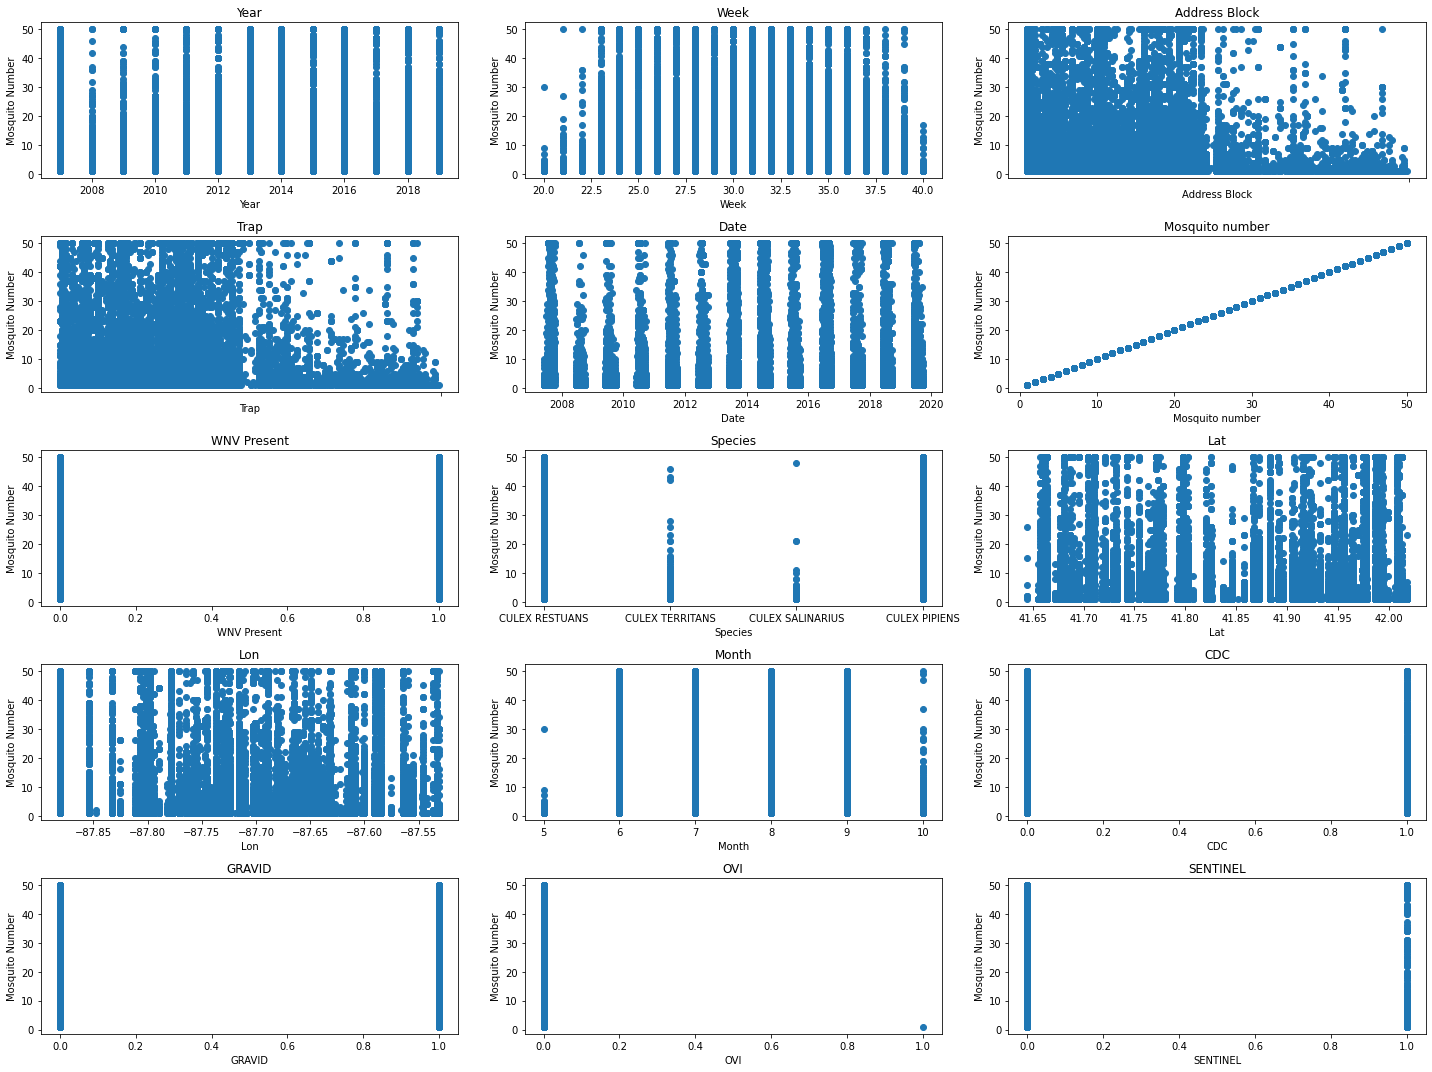

In [62]:
plt.subplots(5, 3, figsize=(20, 15))
count = 1
x = df['Mosquito number']

for col in df.columns:
    plt.subplot(5, 3, count)
    plt.scatter(df[col],x)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Mosquito Number')
    
    if (df[col].dtypes == 'object') & (df[col].nunique() > 5):
        plt.xticks('')
    
    count += 1
    
plt.tight_layout()
plt.show()

It is hard to see straight away if there are any correlations or relationships between any two columns. I will therefore use the Pearson's correlation to determine the relationship between each of the columns with the mosquito number column. 

In [63]:
x = df['Mosquito number']

pearsons = {}

for col in dfcorr.columns:
    if col == 'Mosquito number':
        pass
    else:
        pearsons[col] = [stats.pearsonr(x, dfcorr[col])[0],stats.pearsonr(x, dfcorr[col])[1]]

pearsons_df = pd.DataFrame.from_dict(pearsons)
pearsons_df = pearsons_df.rename(index={0 : 'Pearsons coefficient',1:'P-Value'})
pearsons_df = pearsons_df.T
pearsons_df

,Pearsons coefficient,P-Value
Year,0.129326,8.393050e-70
Week,-0.033900,4.002825e-06
Lat,0.096820,9.096861e-40
Lon,-0.151421,2.765604e-95
Month,-0.040426,3.803876e-08
CDC,0.094147,1.095257e-37
GRAVID,-0.138275,1.267816e-79
OVI,-0.005392,4.634395e-01
SENTINEL,0.108575,1.289396e-49
CULEX PIPIENS,0.014730,4.515190e-02


I created a dataframe above that displays the pearson correlation and P value between each of the columns and the mosquito number.

The hypothesis test for the dataframe above is that:

$H_0$: the column variable and mosquito number are not correlated, $\rho=0$.

$H_1$: the column variable and mosquito number are correlated, $\rho\neq0$.

Looking at the dataframe above the p value for all the columns in the dataframe is well below 0, meaning that for each of the columns we can reject the null hypothesis that they are not correlated. However, correlation does not mean causation and we cannot safely say that there is a correlation between the two columns but we can reject that there is no correlation. 

It should be stated that given the data provided in the Shapiro-Wilk test, the data is not normally distributed so they are likely to produce inaccurate conclusions and type 1 error.

However, looking at the dataframe the columns with the highest correlations are the Longitude, GRAVID and CELEX TERRITANS. Although these values are not something to be alarmed about it does provide valuable insights. 

There is an inversely proportional relationship between mosquito number and longitude. As the longitude decreases the mosquito number increases. The further west and inland you go within Chicago the more mosquitoes are present. This may be due to further urbanisation or more areas of stagnant water which attracts mosquitoes. It was identified previously that GRAVID has a higher efficiency of capturing mosquitoes compared with other traps which explains the positive correlation. Lastly, it seems there is an inverse proportion between CELEX TERRITANS and mosquitoes. As noted earlier this is due to the fact that CULEX TERRITANS tend to feed on cold-blooded animals. This was also demonstrated in the bar charts earlier.

In [64]:
df['Trap'].nunique() #there are too many features for the trap and address to do a pearson correlation so there is no point

190

There were 190 different trap IDs that were used in testing. This could've been seperated into dummy variables and the correlation could have been assessed. However, given the sheer number of different trap IDs this would have complicated the dataframe and would have made it very big. 

<a id = 'lin'></a>

## Linear Modelling

In [65]:
X_lin = dfcorr.drop(['Mosquito number'],axis=1)
y = dfcorr['Mosquito number']

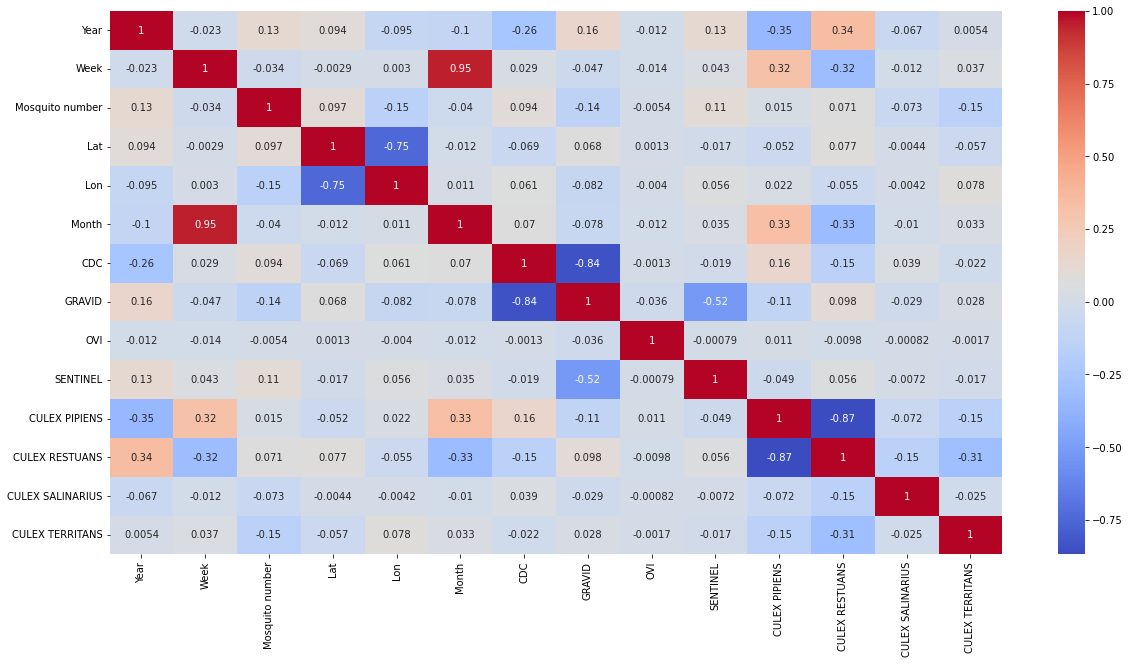

In [66]:
corr = dfcorr.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Looking at the heatmap above, there are a few columns that correlate with each other. Month and week, which is understandable, one column probably derives from the other. Lat and Lon which help to describe the location of a point. CDC and GRAVID which are both trap types and lastly CULEX PIPENS AND CULES RESTUANS. These columns will be removed one by one from the dataframe and linear regression will be applied to it. The data dictionary below will help to demonstrate the effect it has on the model. 

In [67]:
X_lin = X_lin.drop(['CULEX RESTUANS','Month','Lat','GRAVID','OVI'],axis=1)

In [68]:
# import statsmodels linear model for our regression
from statsmodels.regression import linear_model 
import statsmodels.api as sm

# add constant
X_lin = sm.add_constant(X_lin)
my_model = sm.OLS(y, X_lin)
my_model = my_model.fit()
my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     233.2
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:21:33   Log-Likelihood:                -73456.
No. Observations:               18495   AIC:                         1.469e+05
Df Residuals:                   18486   BIC:                         1.470e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2834.4063    100.470    -28.212      0.000   -3031.336   -2637.477
Year                 0.5396      0.028     19.056      0.000       0.484       0.595
Week                -0.1504      0.023     -6.469      0.000      -0.196      -0.105
Lon                -20.1056      1.001    -20.088      0.000     -22.067     -18.144
CDC                 11.0023      0.582     18.917      0.000       9.862      12.142
SENTINEL            12.9275      0.905     14.287      0.000      11.154      14.701
CULEX PIPIENS        1.2968      0.240      5.415      0.000       0.827       1.766
CULEX SALINARIUS    -8.4448      0.868     -9.733      0.000     -10.145      -6.744
CULEX TERRITANS     -8.0256      0.445    -18.055      0.000      -8.897      -7.154
==============================================================================
Omnibus:                     4526.817   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8955.425
Skew:                           1.502   Prob(JB):                         0.00
Kurtosis:                       4.610   Cond. No.                     2.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

| Column removed | R^2 Value | Comments |
| --- | --- | --- |
| No columns removed | 0.093 |  |
| Month | 0.092 |  |
| Week | 0.092 |  |
| CULEX PIPIENS | 0.092 |Week P value increased to 0.28  |
| CULEX RESTUANS | 0.092 | Week and month value increased to 0.28 |
| Month and Lat | 0.092 |  |
| Month and Lon | 0.092 |  |
| Month, Lat and CDC | 0.092 |OVI p value increased to 0.1 and SENTINEL to 0.075  |
| Month, Lat, GRAVID and OVI | 0.092 |OVI p value increased to 0.441  |

Looking at the model summary results it is clear to see that the P values for each of the columns is 0. This may be something worth to note, however, these values are not actually zero. They are incredibly small that Jupyter notebook is not able to display it and therefore the values are rounded to 0. 

However, the p values for all the features in the model are below 0 which is desirable. The R2 value, referring to the table does not fluctuate much around 0.092. This can be explained by the fact that none of the columns in the dataframe are normally distributed so it is incredibly hard to determine a linear relationship between the dependent and independent variables.

One reason for why the p value does not change is due to the fact that the variables are non-linear. Looking back to the top of the report when mapping the average mosquito number for each month, it is non-linear or parabolic. The model is oversimplifying the relationship between mosquito number and month and trying to enforce a linear relationship. That could be a reason why when the month column is removed from the model, the R2 value does not differ. This reasoning could be applied to other columns as well. 

In [69]:
model_resids = my_model.resid
model_fitted_vals = my_model.fittedvalues

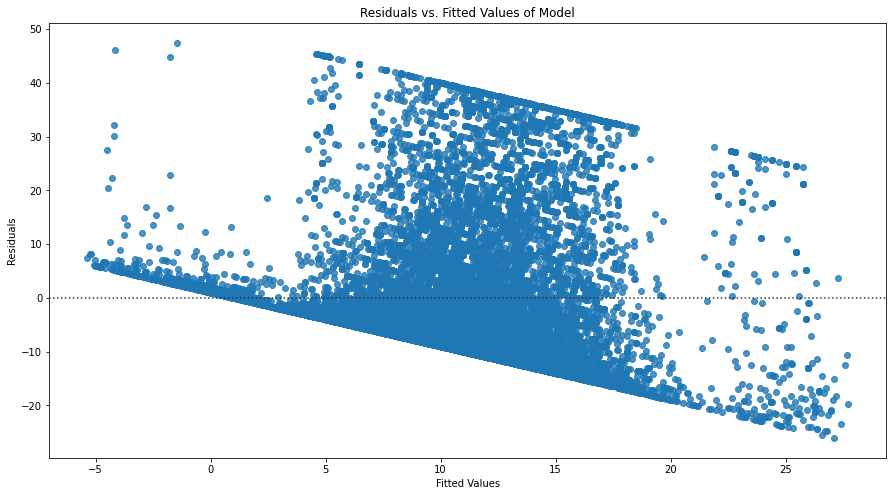

In [70]:
plt.figure(figsize = (15,8))
sns.residplot(x=model_fitted_vals, y=model_resids)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title("Residuals vs. Fitted Values of Model")
plt.show()

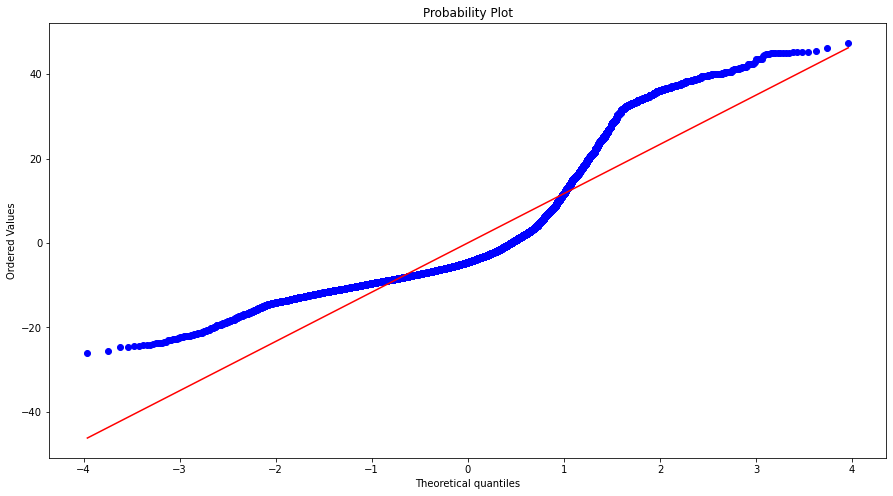

In [71]:
plt.figure(figsize = (15,8))
stats.probplot(model_resids, dist="norm", plot=plt)
plt.show()

In [72]:
print('Shapiro-Wilk test:', stats.shapiro(model_resids))

Shapiro-Wilk test: ShapiroResult(statistic=0.8269255757331848, pvalue=0.0)


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


There is the assumption when conducting linear regression models that the residuals will be normally distributed. Both the histogram and Q-Q plot show that there is a large amount of skewness and deviation from the normal distribution line. 

Furthermore, one of the assumptions for linear regression is homoscedacistity - the variance of error terms are similar across the values of the independent variables. This is exactly the plot we don't want to see. If we see any trends in this plot, it means that we are violating the last assumption of the linear model (homoscedasticity). There seems to be a clear trend that as the fitted values increase the residuals decreases. 

We initially conducted a linear regression model to predict a continuous value of the mosquito number from the conitnuous dependent variables. However, given that we now want to predict a categorical outcome - whether WNV is present or not we can now use a logistic regression model. The output of the logistic regression model will output the probability of 0 or 1 ocurring. In this case the probability of WNV being present or not. 

In addition, normally there would be an opportunity to transform the features. Either by applying a log scale or exponential scale to the variables. However, given the distribution of the histogram there does not seem to be a pattern and this seems like a pointless decision. 

In this case, the logistic regression model follows a similar process to the linear model - with Mosquito number being one of the independent variables. I will also make sure to exclude the columns which were removed earlier as this will skew the results given their colinearity.

<a id = 'logm'></a>
## Logistic Modelling

In [73]:
df3 = pd.get_dummies(df["Species"])
dfcorr1 = pd.concat([df, df3],axis = 1)
dfcorr1 = dfcorr1.drop(columns = ['Species','Address Block','Trap','Date'], axis = 1)
dfcorr1

,Year,Week,Mosquito number,WNV Present,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,2,0,41.977738,-87.880969,9,0,1,0,0,0,1,0,0
1,2019,39,1,0,41.798211,-87.736925,9,0,1,0,0,0,1,0,0
2,2019,39,2,0,41.987245,-87.689417,9,0,1,0,0,0,1,0,0
3,2019,39,1,0,41.953664,-87.724987,9,0,1,0,0,0,1,0,0
4,2019,39,9,0,41.657069,-87.546049,9,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,4,1,41.857843,-87.635858,9,0,1,0,0,1,0,0,0
18491,2007,34,19,1,41.965376,-87.758403,8,0,1,0,0,1,0,0,0
18492,2016,30,34,1,41.662395,-87.590176,7,0,1,0,0,0,1,0,0
18493,2017,33,50,1,41.919197,-87.664758,8,0,0,0,1,0,1,0,0


In [74]:
X_log = dfcorr1.drop(['WNV Present'],axis=1)
y = dfcorr1['WNV Present']

In [75]:
X_log = X_log.drop(['OVI','CULEX PIPIENS','CDC','GRAVID'],axis=1) #removal of columns with colinearity

In [76]:
X_withconstant = sm.add_constant(X_log)
X_withconstant.head()

,const,Year,Week,Mosquito number,Lat,Lon,Month,SENTINEL,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,1.0,2019,39,2,41.977738,-87.880969,9,0,1,0,0
1,1.0,2019,39,1,41.798211,-87.736925,9,0,1,0,0
2,1.0,2019,39,2,41.987245,-87.689417,9,0,1,0,0
3,1.0,2019,39,1,41.953664,-87.724987,9,0,1,0,0
4,1.0,2019,39,9,41.657069,-87.546049,9,0,1,0,0


In [77]:
mylogreg = sm.Logit(y, X_withconstant)
mylogreg_results = mylogreg.fit()
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.405482
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18484
Method:                           MLE   Df Model:                           10
Date:                Thu, 17 Nov 2022   Pseudo R-squ.:                  0.2228
Time:                        14:21:34   Log-Likelihood:                -7499.4
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -523.3018     24.761    -21.134      0.000    -571.833    -474.770
Year                 0.1150      0.007     17.225      0.000       0.102       0.128
Week                 0.1011      0.016      6.310      0.000       0.070       0.132
Mosquito number      0.0648      0.001     45.286      0.000       0.062       0.068
Lat                 -0.6426      0.286     -2.245      0.025      -1.204      -0.082
Lon                 -3.5555      0.335    -10.625      0.000      -4.211      -2.900
Month                0.2150      0.069      3.125      0.002       0.080       0.350
SENTINEL            -0.3919      0.171     -2.295      0.022      -0.727      -0.057
CULEX RESTUANS      -0.2463      0.051     -4.808      0.000      -0.347      -0.146
CULEX SALINARIUS    -0.9995      0.322     -3.102      0.002      -1.631      -0.368
CULEX TERRITANS     -2.4881      0.274     -9.065      0.000      -3.026      -1.950
====================================================================================
"""

| Column removed | Comments |
| --- | --- |
| No columns removed |P value of 1 for dummy variables |
| OVI |All species and trap type p values are 1  |
| Week |No Change  |
| OVI and CULEX PIPIENS | Species values return to and Salinarius to 0.02, trap types are still close to 1  |
| OVI, CDC CULEX PIPIENS | GRAVID and SENTINEL still high 0.26 and 0.23 |
| OVI, CDC, GRAVID AND CULEX PIPIENS | All p values are below threshold  |

The difference between this and the linear model is that the coefficients is not represented in terms of their impact on the probability of getting class 1 (WNV) or class 0 (not getting WNV) but rather in terms of the odds ratio of getting class 1. 

When dropping columns I ecountered a single matrix error. This was due to the OVI column being mainly 0 with an individual 1 number. So when calculating the determinant of the matrix it will be infinity and when inverting the matrix to do the calculation the computer will not be able to comprehend it. Therefore, when I was conducting my modelling I ensured that the OVI column was always dropped. There is the case that the OVI column does not need to be included in the calculation as there is only one recording of it in the whole database but I chose to include it in as it still adds value to the dataframe. 

Looking at the table of iterations it is clear to see that there is some sort of colinearity between the trap types. Even though I removed OVI and CDC, there was still a high value for the GRAVID and SENTINEL p values. Therefore, they had to be removed to ensure that the logistic model was accurate enough. Furthermore, it seems that there was colinearity between the species of mosquito which is to be expected. But once CULEX PIPIENS was removed this helped to lower the values of the p value and not skew the results. 

In [78]:
np.mean((mylogreg_results.predict(X_withconstant) > 0.50) == df['WNV Present'])

0.8110300081103001

From the code above, testing our model. It seems that with the threshold value of 0.5, the model is predicting whether there is WNV present or not 81% of the time. However, we can see how the model performance would change with a varying threshold. 

In [79]:
thresholds = np.arange(0, 1, 0.01)
predictions = mylogreg_results.predict(X_withconstant)

accuracies = []
for p in thresholds:
    accuracies.append(np.mean((predictions > p) == df['WNV Present']))

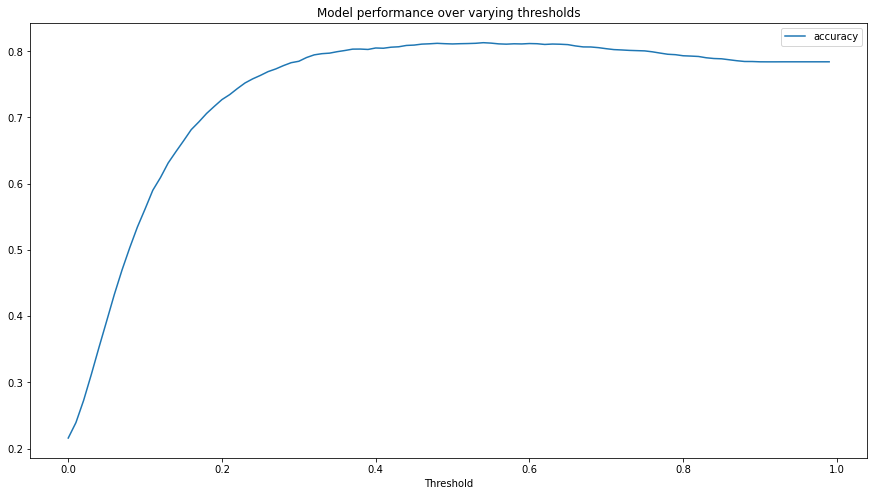

In [80]:
pd.DataFrame(data={'accuracy': accuracies}, index=thresholds).plot(kind="line",figsize = (15,8))
plt.xlabel("Threshold")
plt.title("Model performance over varying thresholds")
plt.show()

As can be seen that when the threshold reaches 0.2 the model performance plateaus. This means that there are a larger number of 0 values in the model which were being recorded wrong compared to 1 values. Therefore, as the threshold value increased the model performance increased as the model was predicting more results correctly. However, there was still an area of incorrect predictions which led to it only reaching a maximum value of 81%. As the threshold reached one the performance dropped back down again which was due to more positive values being predicted incorrectly. 

## Conclusion

In conclusion, the linear model was incredibly poor. Given the assumptions made about the data surrounding the fact that the data must homoscedastic and that the data should be normally distributed. This was not the case from the results demonstrated by the low R2 value. There could have been an opportunity to transform the features data before inputting it into the model, however, that seemed pointless given the non-linearity of the data. However, on the other hand the logistic regression model had an accuracy of 81% but there were limitations to the model as it was unable to perform any better than that demonstrated by the plateau in the line graph. To increase the linear regression performance, the data needs to be more linear and this will help the models predictions. 

## Next Steps

- Further tuning of the model parameters 
- Applying more statistical methods to understand the data